In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]
inpatient_cardi = inpatient[inpatient['Cardiovascular'] == 1].drop(columns = ['Cardiovascular','First listed discharge diagnosis icd10 subcategory','Second listed discharge diagnosis icd10 subcategory'])
inpatient_cardi.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Readmission
5,100020,54.555173,2016-03-27 21:58:50.0,2016-03-27 23:41:21.0,NON-COUNT,NON-COUNT,PSYCH RESID REHAB TRMT PROG,ED OBSERVATION,Regular,0,1,NaN,0.0,Pennsylvania,1
6,100029,87.512004,2012-10-02 15:17:51.0,2012-10-09 10:35:23.0,SURGERY,MEDICINE,GASTROENTEROLOGY,TELEMETRY,Regular,0,1,NaN,0.0,Florida,1
7,10003,54.703168,2002-04-25 00:11:38.0,2002-06-11 01:08:19.0,MEDICINE,MEDICINE,INTERMEDIATE MEDICINE,GENERAL(ACUTE MEDICINE),Regular,0,1,NaN,NaN,Texas,1
8,10003,55.271575,2002-11-18 18:15:13.0,2002-11-26 21:17:51.0,SURGERY,SURGERY,NH SHORT STAY REHABILITATION,PERIPHERAL VASCULAR,Regular,0,1,NaN,NaN,Texas,1
9,10003,60.837758,2008-06-14 04:48:50.0,2008-06-25 18:44:59.0,MEDICINE,MEDICINE,"STAR I, II & III",Not specified (no value),Regular,0,1,NaN,1.0,Texas,1


In [30]:
'''
path = '/home/bhatti/dataset/VCHAMPS/medications_ordered_train.csv'
medications_ordered = pd.read_csv(path).iloc[:,1:]
medications_ordered.head()
'''

"\npath = '/home/bhatti/dataset/VCHAMPS/medications_ordered_train.csv'\nmedications_ordered = pd.read_csv(path).iloc[:,1:]\nmedications_ordered.head()\n"

In [31]:
'''
pid = set.intersection(set(inpatient_cardi['Internalpatientid'].unique()),
                       set(medications_ordered['Internalpatientid'].unique()))

inpatient = inpatient_cardi[inpatient_cardi['Internalpatientid'].isin(pid)].reset_index(drop = True)
medications = medications_ordered[medications_ordered['Internalpatientid'].isin(pid)].reset_index(drop = True)
'''

"\npid = set.intersection(set(inpatient_cardi['Internalpatientid'].unique()),\n                       set(medications_ordered['Internalpatientid'].unique()))\n\ninpatient = inpatient_cardi[inpatient_cardi['Internalpatientid'].isin(pid)].reset_index(drop = True)\nmedications = medications_ordered[medications_ordered['Internalpatientid'].isin(pid)].reset_index(drop = True)\n"

In [8]:
#medications.to_csv('/home/daisy/FDA_Dataset/medications_ordered_cardi.csv')

In [3]:
path = '/home/daisy/FDA_Dataset/medications_ordered_cardi.csv'
medications = pd.read_csv(path).iloc[:,1:]
medications.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:06:15.0,2002-12-01 15:06:15.0,glyceryl trinitrate,discontinued,Not specified (no value),Florida
1,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:06:15.0,2002-12-01 15:06:15.0,lidocaine,discontinued,Not specified (no value),Florida
2,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:05:15.0,2002-12-01 15:05:15.0,dopamine,discontinued,Not specified (no value),Florida
3,1000,83.372701,2002-11-26 17:20:15.0,2002-11-26 17:12:15.0,2002-12-01 15:04:15.0,2002-12-01 15:04:15.0,dobutamine,discontinued,Not specified (no value),Florida
4,1000,83.374655,2002-11-27 10:28:12.0,2002-11-27 08:04:12.0,2002-11-28 13:30:12.0,2002-11-28 13:30:12.0,enoxaparin,discontinued,Not specified (no value),Florida


In [6]:
medications = medications.drop_duplicates(subset = ['Internalpatientid','Order date', 'Ordered medication atc 5'],keep = 'first')

In [7]:
medications[medications[['Internalpatientid','Order date', 'Ordered medication atc 5']].duplicated()]

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State


From Ordered medication atc 5.unique(), extract medicines that may highly related to cardiovascular

In [8]:
cardi_med = ['glyceryl trinitrate', 'lidocaine', 'dopamine', 'dobutamine',
             'enoxaparin', 'digoxin','spironolactone','amlodipine',
             'clopidogrel', 'atorvastatin', 'metoprolol','lisinopril',
             'warfarin', 'carvedilol']

In [9]:
# if the patient use a cardiovascular relate medicine, count = 1
medications['medication_cnt'] = medications['Ordered medication atc 5'].apply(lambda x: 1 if x in cardi_med else 0)

# total number of cardiovascular relate medicine a patient takes
medications['num_medication'] = medications['medication_cnt'].groupby(medications['Internalpatientid']).transform('sum')

In [10]:
test = medications.copy()
test['Order date'] = pd.to_datetime(test['Order date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32273380 entries, 0 to 34872330
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Internalpatientid         int64         
 1   Age at med ordered        float64       
 2   Order date                datetime64[ns]
 3   Medication start date     object        
 4   Medication stop date      object        
 5   Order discontinue date    object        
 6   Ordered medication atc 5  object        
 7   Order status              object        
 8   Stop reason               object        
 9   State                     object        
 10  medication_cnt            int64         
 11  num_medication            int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 3.1+ GB


In [11]:
# sort by order date, since order date has no missing values
#start date(1250566) and stop date(570867) have too many missing values

# Calculate the total order time length for each patient every year(365 days)
# No missing value in order_diff
order_min = test['Order date'].groupby(test['Internalpatientid'],group_keys= False).min()
order_max = test['Order date'].groupby(test['Internalpatientid'],group_keys= False).max()
data = (order_max - order_min).apply(lambda x: round(pd.Timedelta(x).days / 365,2))
order_diff = pd.DataFrame(data).reset_index(drop = False)
order_diff =  order_diff.rename(columns={'Order date':'Order time diff'})
order_diff

,Internalpatientid,Order time diff
0,2,21.30
1,3,4.20
2,4,14.24
3,5,5.90
4,13,5.92
...,...,...
50044,169051,7.92
50045,169053,7.24
50046,169055,11.09
50047,169057,21.42


In [12]:
order_diff.describe()

,Internalpatientid,Order time diff
count,50049.000000,50049.000000
mean,84471.413455,12.090086
std,48903.718081,6.644584
min,2.000000,0.000000
25%,41835.000000,6.520000
50%,84644.000000,12.100000
75%,126812.000000,17.810000
max,169060.000000,23.640000


In [13]:
# If a patient order drugs many times less than a year, 
# The order frequency may be very high
order_diff[order_diff['Order time diff'] < 1]

,Internalpatientid,Order time diff
44,123,0.74
45,129,0.90
63,189,0.28
71,229,0.58
91,293,0.04
...,...,...
49901,168571,0.95
49971,168813,0.38
49987,168881,0.84
50001,168930,0.35


In [14]:
num_medications =medications[['Internalpatientid','num_medication']].drop_duplicates(keep = 'first').reset_index(drop = True)
orders = num_medications.merge(order_diff, how = 'inner', suffixes=(' ', ' '),on = 'Internalpatientid')
orders['Order freq year'] = round(orders['num_medication'] / orders['Order time diff'],1).apply(lambda x: x if x != float('inf') else 0)
orders

,Internalpatientid,num_medication,Order time diff,Order freq year
0,1000,62,4.97,12.5
1,10000,35,2.10,16.7
2,100003,19,4.30,4.4
3,100005,2,3.53,0.6
4,100008,193,14.78,13.1
...,...,...,...,...
50044,99983,18,22.59,0.8
50045,99986,61,21.02,2.9
50046,9999,53,18.68,2.8
50047,99992,204,5.30,38.5


In [15]:
orders.describe()

,Internalpatientid,num_medication,Order time diff,Order freq year
count,50049.000000,50049.000000,50049.000000,50037.000000
mean,84471.413455,82.592919,12.090086,11.711052
std,48903.718081,70.721383,6.644584,41.024919
min,2.000000,0.000000,0.000000,0.000000
25%,41835.000000,35.000000,6.520000,3.600000
50%,84644.000000,65.000000,12.100000,6.200000
75%,126812.000000,109.000000,17.810000,10.900000
max,169060.000000,1445.000000,23.640000,2900.000000


In [16]:
# Add targets to medications from inpatient table
inpatient_subset = inpatient_cardi[['Internalpatientid','Died during admission', 'Readmission']]
inpatient_subset = inpatient_subset.merge(orders, how = 'inner', on = 'Internalpatientid')

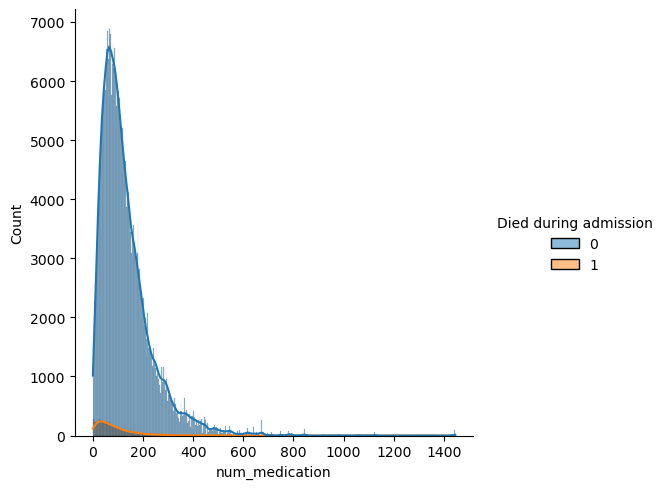

In [17]:
sns.displot(data=inpatient_subset, x='num_medication', hue = 'Died during admission', kde=True)

The Distribution of Number of medications is very skewed. We cannot understand the trend from here.

As the majority of the patinet have 0 orders each year.

We will look into deeply, We will drill down the data and look for data in detail.


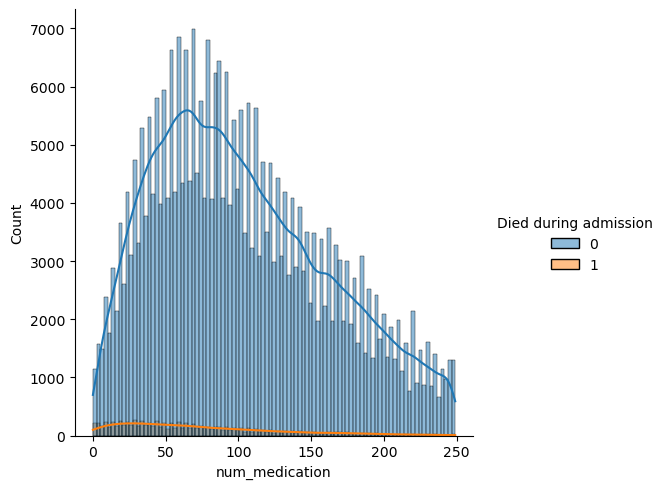

In [18]:
sns.displot(data=inpatient_subset.loc[inpatient_subset['num_medication'] < 250], x='num_medication', hue = 'Died during admission', kde=True)

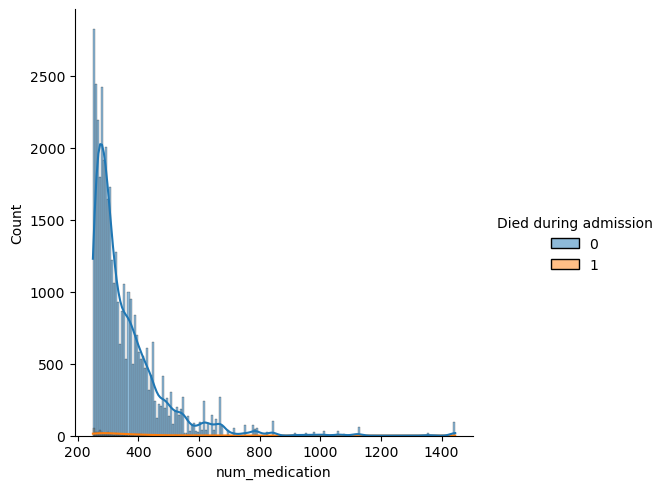

In [19]:
sns.displot(data=inpatient_subset.loc[inpatient_subset['num_medication'] >= 250], x='num_medication', hue = 'Died during admission', kde=True)

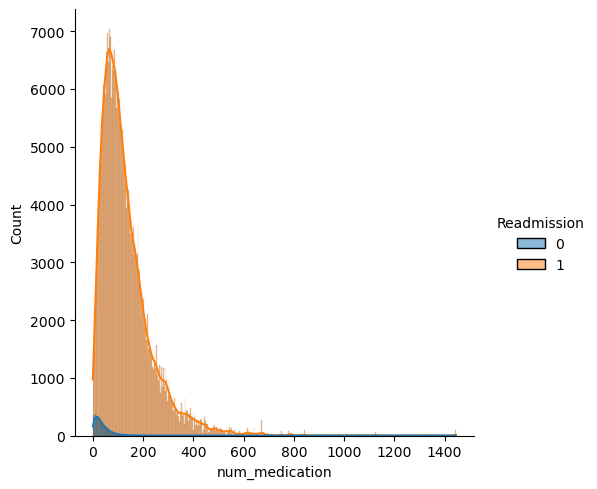

In [20]:
sns.displot(data=inpatient_subset, x='num_medication', hue = 'Readmission', kde=True)

The Distribution of Number of Medication is very skewed. We cannot understand the trend from here.

As the majority of the patinet have 0 orders each year.

We will look into deeply, We will drill down the data and look for data in detail.


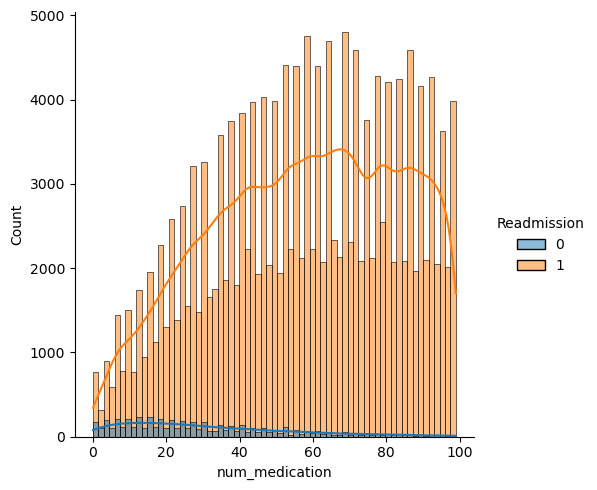

In [21]:
sns.displot(data=inpatient_subset.loc[inpatient_subset['num_medication'] < 100], x='num_medication', hue = 'Readmission', kde=True)

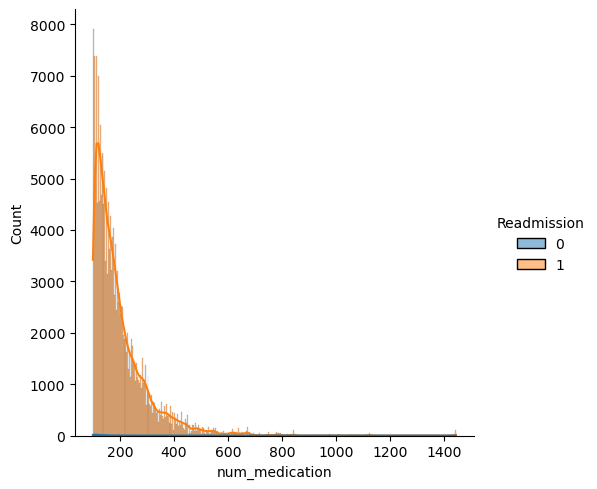

In [22]:
sns.displot(data=inpatient_subset.loc[inpatient_subset['num_medication'] >= 100], x='num_medication', hue = 'Readmission', kde=True)

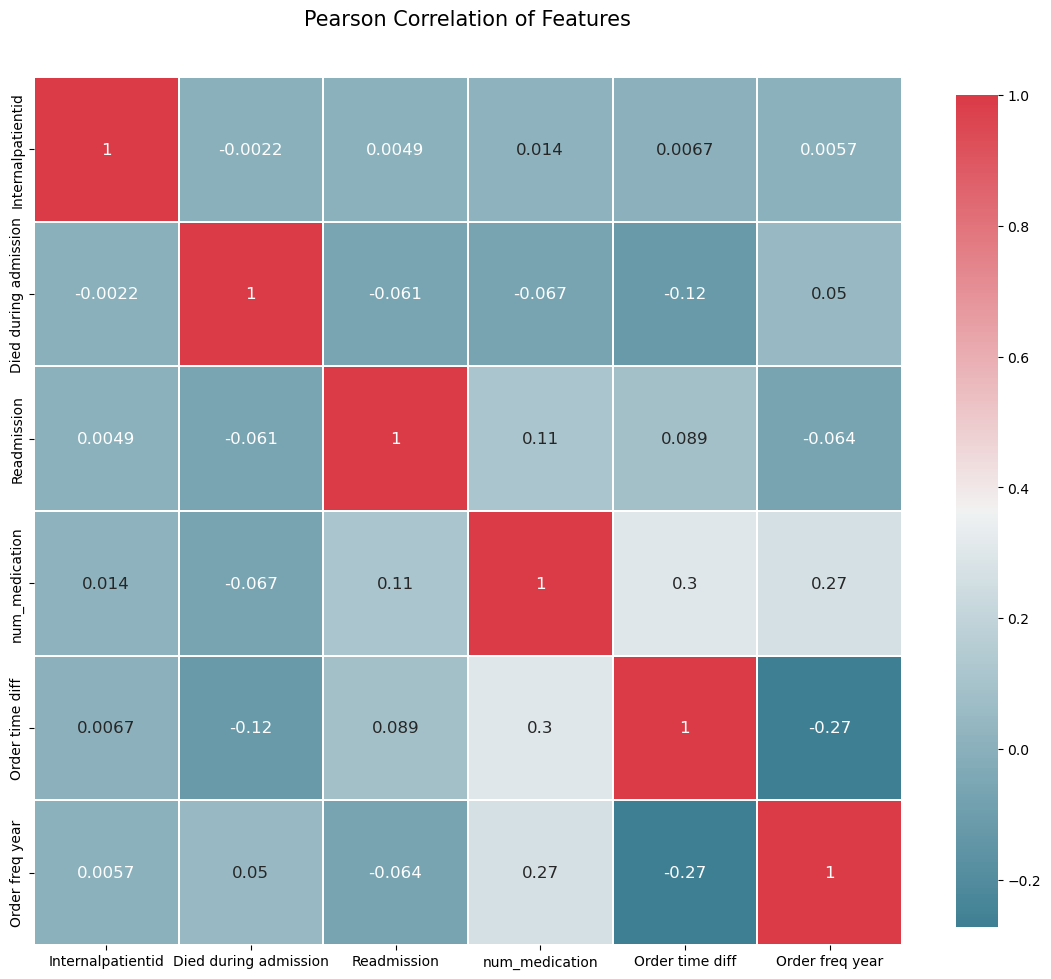

In [23]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_subset)

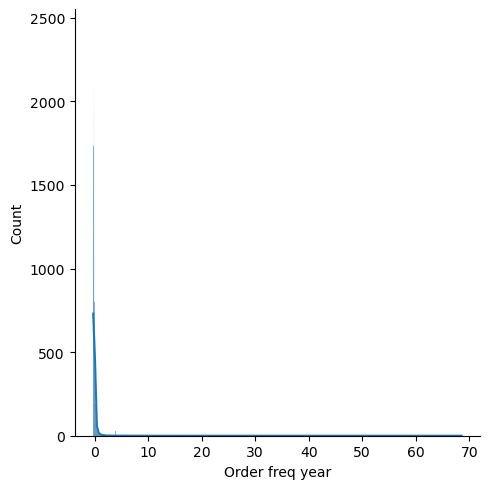

In [33]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
orders_scaled = orders.copy()
orders_scaled[['Order freq year','num_medication']] = scaler.fit_transform(orders_scaled[['Order freq year','num_medication']])
sns.displot(data=orders_scaled, x='Order freq year', kde=True)
'''

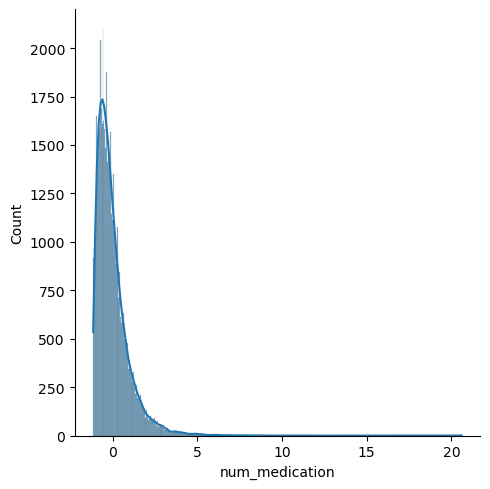

In [36]:
#sns.displot(data=orders_scaled, x='num_medication', kde=True)

In [12]:
'''
medications2 = medications.copy()
medications2 = medications2.merge(orders, how = 'inner', suffixes=(' ', ' '),
                                  on = 'Internalpatientid').sort_values(by = 'Internalpatientid')
medications2.drop(['medication_cnt', 'num_medication ',
       'num_medication ', 'Order time diff'], axis = 1, inplace = True)
'''